In [1]:
import sklearn as sk
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import log_loss
from sklearn.svm import SVC

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
X = data['data']
y = data['target']

In [5]:
def plot_vals(X_vals, targets):
    plt.scatter(X_vals[:, 0], X_vals[:, 1], c=targets)
    plt.show()

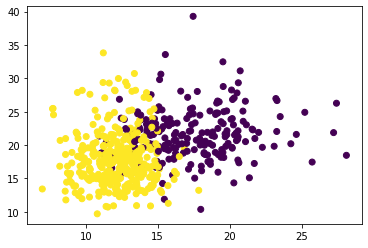

In [6]:
plot_vals(X[:, 0:2], y)

### Try SVM

In [11]:
svm_clf = SVC(kernel='linear')
svm_clf = svm_clf.fit(X[:, 0:2], y)

In [12]:
log_loss(y, svm_clf.predict(X[:, 0:2]))

3.824213173231761

In [15]:
def show_solution(mdl, x, step=1.0):
    x0 = x[:, 0]
    x0_range = np.round(x0.max() - x0.min())
    x1 = x[:, 1]
    x1_range = np.round(x1.max() - x1.min())
    
    x = np.arange(x0.min(), x0_range + x0.min(), step)
    y = np.arange(x1.min(), x1_range + x1.min(), step)
    x, y = np.meshgrid(x, y)
    xy = np.array([x, y]).transpose((1, 2, 0)).reshape(-1, 2)

    pred = mdl.predict(xy)
    plt.scatter(xy[:, 0], xy[:, 1], c=pred)
    plt.show()
    

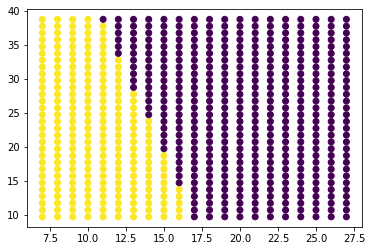

In [16]:
show_solution(svm_clf, X[:, 0:2], 1)

### Check sklearn decision tree

In [28]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=4, criterion='entropy')
clf = clf.fit(X[:, 0:2], y)

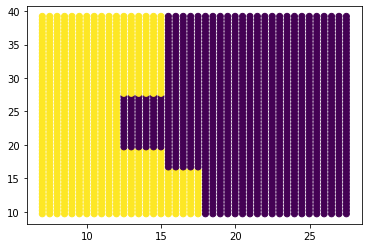

In [29]:
show_solution(clf, X[:, 0:2], 0.5)

In [30]:
log_loss(y, clf.predict(X[:, 0:2]))

3.217169669040439